Скачайте текст произведения «Война и мир»: ссылка на GitHub и Google Drive.

Очистите его, оставив только русские буквы и символы пробела.

Постройте матрицу переходных вероятностей.

Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.

Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [ ]:
!pip install hmmlearn

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
from hmmlearn import hmm

In [3]:
with open('tom_1.txt', 'r') as f:
    text1 = f.read().lower()
text1 = re.sub(r'[^а-яё+\s]','', text1)
text1 = re.sub(r'[\n+]','', text1)

In [4]:
with open('tom_2.txt', 'r') as f:
    text2 = f.read().lower()
text2 = re.sub(r'[^а-яё+\s]','', text2)
text2 = re.sub(r'[\n+]','', text2)

In [5]:
with open('tom_3.txt', 'r') as f:
    text3 = f.read().lower()
text3 = re.sub(r'[^а-яё+\s]','', text3)
text3 = re.sub(r'[\n+]','', text3)

In [6]:
with open('tom_4.txt', 'r') as f:
    text4 = f.read().lower()
text4 = re.sub(r'[^а-яё+\s]','', text4)
text4 = re.sub(r'[\n+]','', text4)

In [7]:
text = text1 + text2 + text3 + text4

In [9]:
russian = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '

In [10]:
letters = {item: i for i, item in enumerate(russian)}
letters

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ё': 6,
 'ж': 7,
 'з': 8,
 'и': 9,
 'й': 10,
 'к': 11,
 'л': 12,
 'м': 13,
 'н': 14,
 'о': 15,
 'п': 16,
 'р': 17,
 'с': 18,
 'т': 19,
 'у': 20,
 'ф': 21,
 'х': 22,
 'ц': 23,
 'ч': 24,
 'ш': 25,
 'щ': 26,
 'ъ': 27,
 'ы': 28,
 'ь': 29,
 'э': 30,
 'ю': 31,
 'я': 32,
 ' ': 33}

In [11]:
prob = np.zeros((len(russian), len(russian)))
prob

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
for prev, next in zip(text[:-1], text[1:]):
  prob[letters[prev], letters[next]] +=1

In [13]:
prob = (prob / prob.sum(axis=1)[:, None])

In [14]:
df = pd.DataFrame(prob, index=(c for c in russian), columns=(c for c in russian))
df

,а,б,в,г,д,е,ё,ж,з,и,...,ч,ш,щ,ъ,ы,ь,э,ю,я,
а,0.000196,0.008748,0.047077,0.012012,0.027278,0.013674,0.000000,0.016752,0.056727,0.001858,...,0.010690,0.018371,0.003376,0.000000,0.000000,0.000000,0.000042,0.010887,0.034136,0.237949
б,0.065245,0.000600,0.005402,0.000675,0.001525,0.141918,0.000025,0.000450,0.000050,0.048690,...,0.001375,0.000300,0.013454,0.006777,0.272507,0.002501,0.000025,0.000275,0.029309,0.014904
в,0.138951,0.000432,0.001043,0.000977,0.007827,0.111638,0.000009,0.000028,0.012524,0.078979,...,0.001015,0.030019,0.000103,0.000338,0.063768,0.004134,0.000009,0.000019,0.005186,0.163295
г,0.056217,0.000000,0.002363,0.000066,0.062355,0.030714,0.000000,0.000066,0.000088,0.043013,...,0.001634,0.000420,0.000000,0.000000,0.000066,0.000110,0.000000,0.000199,0.000066,0.046744
д,0.165234,0.001248,0.037191,0.000298,0.001050,0.170894,0.000028,0.000539,0.000099,0.095730,...,0.001248,0.004695,0.000014,0.006553,0.023404,0.015262,0.000028,0.001645,0.016156,0.041844
е,0.000480,0.016026,0.021478,0.049143,0.037187,0.023199,0.000011,0.014965,0.017224,0.002718,...,0.013455,0.009602,0.008641,0.000000,0.000000,0.000000,0.000021,0.003838,0.005078,0.239995
ё,0.000000,0.000000,0.001970,0.002956,0.001970,0.000000,0.000000,0.001970,0.001970,0.000000,...,0.000000,0.001970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.920197
ж,0.149059,0.005917,0.000000,0.001469,0.081405,0.410577,0.000000,0.002081,0.000000,0.151140,...,0.004448,0.000000,0.000000,0.000000,0.000000,0.004489,0.000041,0.003142,0.000000,0.021912
з,0.357291,0.011746,0.053735,0.026740,0.045794,0.016059,0.000000,0.010909,0.004973,0.023620,...,0.001066,0.000685,0.000000,0.001066,0.038030,0.040669,0.000000,0.004592,0.031764,0.087097
и,0.001461,0.007315,0.043226,0.008590,0.026750,0.046781,0.000000,0.006764,0.033816,0.014355,...,0.021504,0.006015,0.002447,0.000000,0.000000,0.000006,0.000051,0.006028,0.031862,0.331151


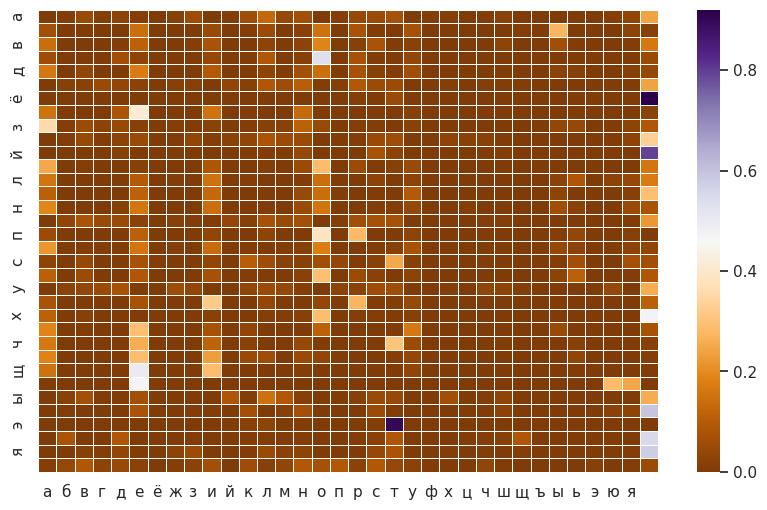

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df, cmap='PuOr', linewidths=0.5, linecolor='white')
plt.show()

In [16]:
start = letters['п']
end = letters['р']
prior = 1. / len(russian)
for c in russian:
  for x in russian:
    proba = prior * prob[start, letters[c]] * prob[letters[c], letters[x]] * prob[letters[x], end]
    if proba > 0:
       print(''.join(['п', c, x, 'р']), proba)

паар 1.2483021244621608e-08
пабр 1.0155553856672825e-06
павр 1.15917977686471e-06
пагр 1.2848114697473956e-06
падр 2.942105165838902e-06
паер 1.9503146628298786e-06
пажр 7.311949848239609e-09
пазр 1.2095790878783555e-06
паир 2.547790864803073e-08
пайр 2.7599678947720997e-08
пакр 4.83849984690539e-06
палр 3.3611556905914123e-09
памр 1.0930948458598652e-07
панр 1.161326477180596e-07
паор 4.339681014540716e-08
папр 5.626388035700382e-06
парр 2.870279020272537e-08
паср 5.043304580053417e-07
патр 5.524111015460852e-06
паур 6.923602698965342e-08
пафр 3.17685218286211e-06
пахр 2.440818119506081e-07
пачр 2.6506060145138035e-08
пашр 5.266004634220631e-09
пащр 4.5451641687422465e-09
паэр 3.402682747656317e-10
паюр 1.6147067665876867e-07
паяр 1.4938299828069804e-07
па р 8.69681409376144e-06
пвар 2.806393138584855e-09
пвбр 1.5943951085774744e-11
пввр 8.160012706997085e-12
пвгр 3.321084346893555e-11
пвдр 2.682355228700592e-10
пвер 5.0598785244545456e-09
пвёр 5.843288720706058e-14
пвжр 3.90939163635

In [35]:
s = ['б']
length = 7
for i in range(length):
    index = letters[s[i]]
    next_char = np.random.choice(list(russian), p=prob[index])
    s.append(next_char)

print (''.join(s))

безгитои


In [18]:
robberies = pd.read_csv("monthly-boston-armed-robberies-j.csv", index_col='Month', parse_dates=True)
robberies.head(2)

,Count
Month,
1966-01-01,41
1966-02-01,39


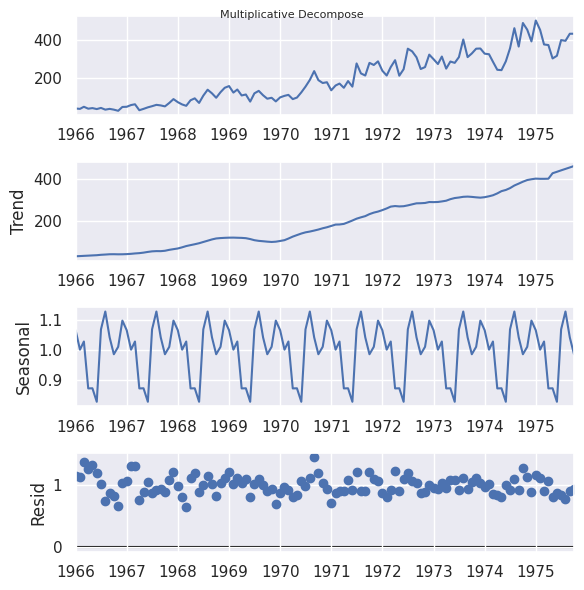

In [19]:
decompose = seasonal_decompose(robberies, model='multiplicative', extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (6, 6)})
decompose.plot().suptitle('Multiplicative Decompose', fontsize=8)
plt.show()

In [20]:
adf_test = adfuller(robberies)
adf_test[1]

0.994277563805723

In [21]:
data = boxcox(robberies.Count, 0)
data = data[1:] - data[:-1]
data = data[12:] - data[:-12]

In [22]:
adf_test_= adfuller(data)
adf_test_[1]

0.0005791258821324569

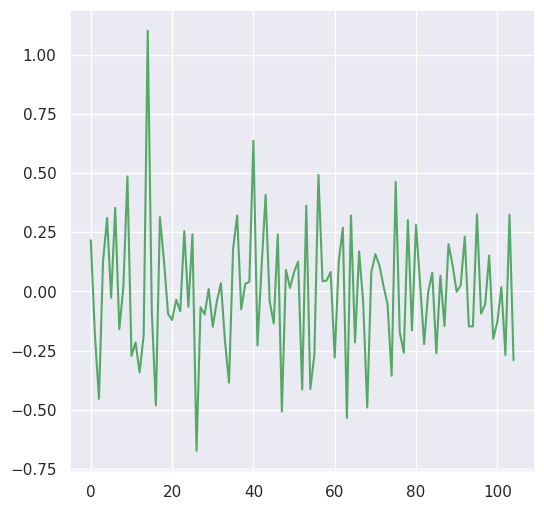

In [23]:
plt.plot(data, 'g')

In [24]:
df = pd.Series(data)

In [25]:
x = df.values.reshape(-1, 1)

In [26]:
for n in range(1, 15):
    model_ = hmm.GaussianHMM(n_components=n, covariance_type="diag", n_iter=1000).fit(x)
    print(n, model_.score(x))

1 -11.964017308855132
2 -8.028530585729646
3 -7.188142624383735
4 2.578307637998814
5 2.821684687414729
6 5.0239406185483055
7 15.4461799973035
8 17.941401086546605


9 23.869601760163466
10 23.05041889714076


11 26.85782361623285


12 22.20805302708222


13 30.803681171654553
14 30.71619425479021


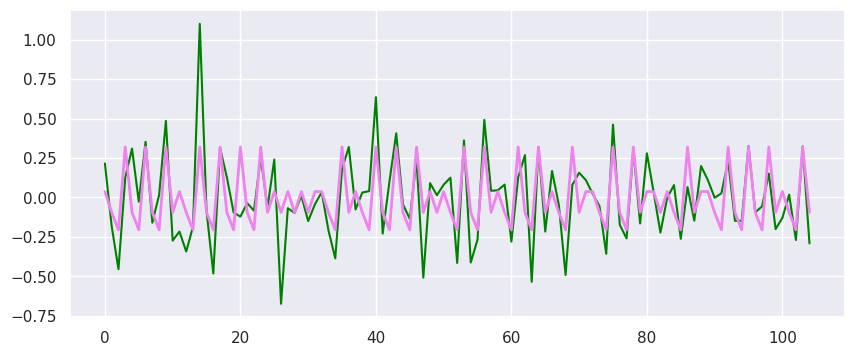

In [27]:
model = hmm.GaussianHMM(n_components=4, covariance_type='diag', n_iter=1000).fit(x)
hidden_states = model.predict(x)
means = np.zeros_like(x)
for i in range(model.n_components):
    means[hidden_states == i] = model.means_[i]

plt.figure(figsize=(10, 4))
plt.plot(x, color='green')
plt.plot(means, color='violet', lw=2)

In [28]:
model.score(x)

0.20432746350501177

In [29]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

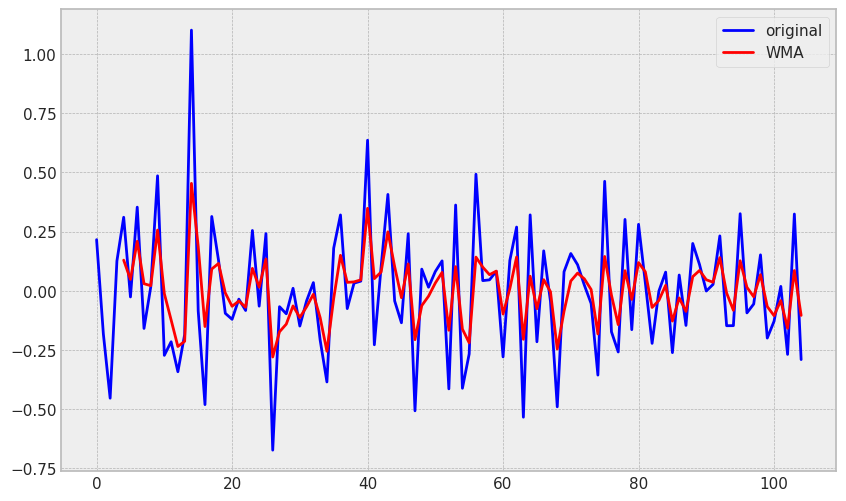

In [30]:
wma = weighted_moving_average(data, 5, [1,2,4,8,16])

with plt.style.context('bmh'):
    plt.figure(figsize=(10, 6))
    plt.plot(data, color='blue',label='original')
    plt.plot(wma, color='red', linewidth='2', label='WMA')
    plt.legend()

In [38]:
train, test = x[:80], x[80:]
test = test.flatten()

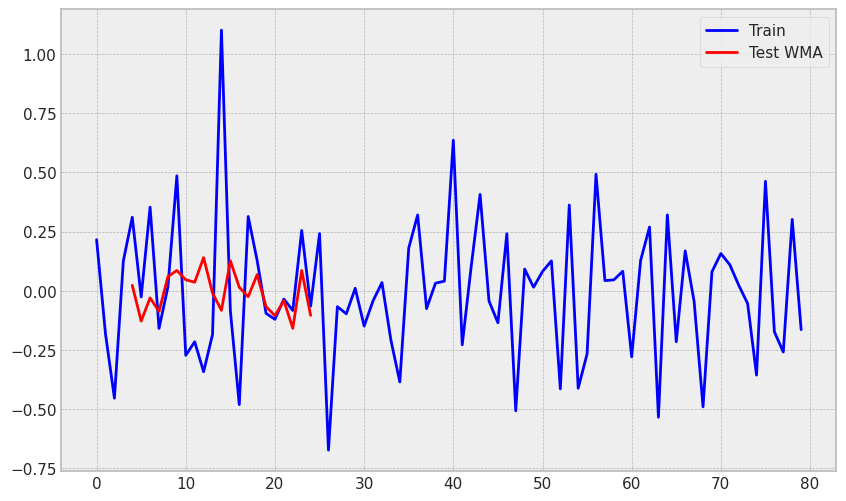

In [39]:
wma = weighted_moving_average(test, 5, [1,2,4,8,16])

with plt.style.context('bmh'):
    plt.figure(figsize=(10, 6))
    plt.plot(train, color='blue',label='Train')
    plt.plot(wma, color='red', linewidth='2', label='Test WMA')
    plt.legend()